# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
from scipy import stats
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [47]:
# Your work here.

In [48]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [49]:
df.shape

(130, 3)

In [50]:
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

In [51]:
df.dtypes

temperature    float64
gender          object
heart_rate     float64
dtype: object

## Question 1

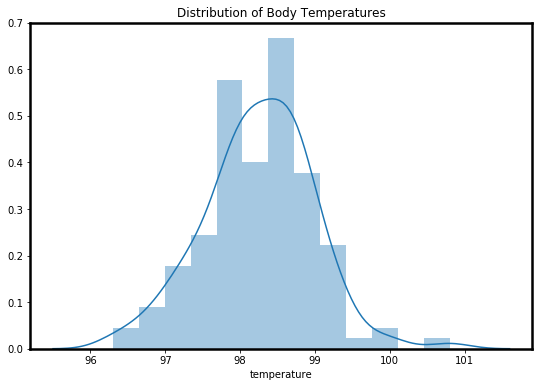

In [52]:

fig, ax = plt.subplots(figsize=(9, 6))
plt.title("Distribution of Body Temperatures")
sns.distplot(df['temperature'])
plt.figure(figsize = [9,6]) # [width, height]

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)

## The distribution of body temperatures is mostly normal. There looks like a slight skew and a small second peak for very high temperatures.

## Q-Q plot: most of the body temperature points are on the diagonal line which confirms the distribution of temperature is mostly Normal.

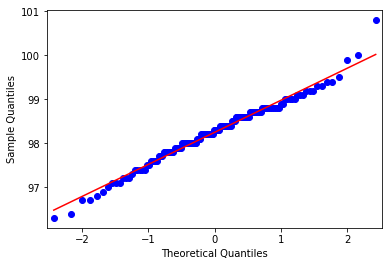

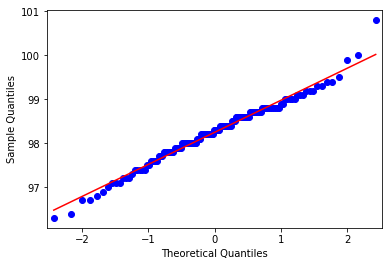

In [53]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(data = df['temperature'], line='s')
#pyplot.show()

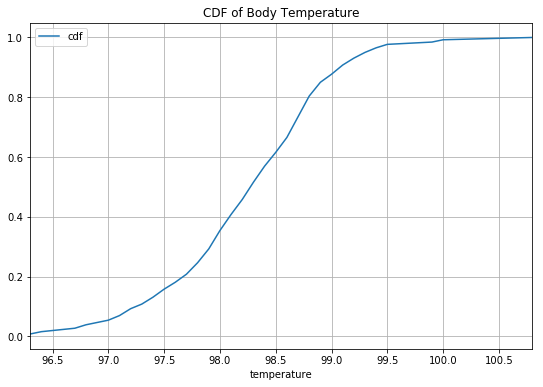

In [54]:
# Create CDF plot values for body temperature data

df['cdf'] = df.temperature.rank(method = 'average', pct = True)

df.sort_values('temperature').plot(x = 'temperature', y = 'cdf', figsize = (9,6),grid = True)

plt.title("CDF of Body Temperature")

In [55]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [56]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
samples = np.random.normal(mu,sigma, 10000)
print(mu)
print()
print(sigma)

98.24923076923078

0.7303577789050377


In [57]:
x_theo,y_theo = ecdf(samples)
x_temp,y_temp = ecdf(df.temperature)

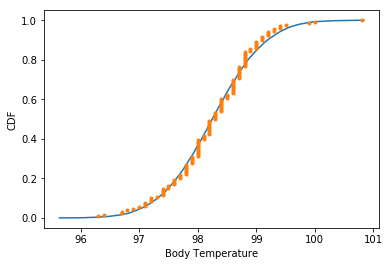

In [58]:
# Plot the CDFs and show the plot
_ = plt.plot(x_theo, y_theo)
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('CDF')
plt.show()

##  The Cumulative Distribution Function (CDF) for body temperature looks sigmoidal which is expected for a Normal Distribution. In addition, the theoretical CDF values for a Theoretical Normal Distribution with the mean and standard deviation of the body temperature data matches very closely to ECDF of body temperature data. This is more evidence that body temperature data has a Normal Distribution. 

## The mean,median and mode for the body temperature data are practically identical further confirming that the body temperature data has a Normal Distribution.

In [59]:
print("Mean of body temperature:")
print(np.mean(df.temperature))
print()
print("Median of body temperature:")
print(np.median(df.temperature))
print()
print("Mode of body temperature:")
print(stats.mode(df.temperature))
print()

Mean of body temperature:
98.24923076923078

Median of body temperature:
98.3

Mode of body temperature:
ModeResult(mode=array([ 98.]), count=array([11]))



## Calculate the percentage of body temperature data that is within one standard devation of the mean body temperature.

In [60]:
print("Standard deviation of body temperature:")
print(np.std(df.temperature))
print()
print("One Standard deviation above mean body temperature:")
print(np.std(df.temperature) + np.mean(df.temperature))
print()
print("One Standard deviation below mean body temperature:")
print(np.mean(df.temperature)- np.std(df.temperature))
print()

Standard deviation of body temperature:
0.7303577789050377

One Standard deviation above mean body temperature:
98.97958854813581

One Standard deviation below mean body temperature:
97.51887299032575



In [61]:
one_std_dev_ = df.temperature.apply(lambda x: True if (x > np.mean(df.temperature)- np.std(df.temperature)) &
                                (x < np.mean(df.temperature)+ np.std(df.temperature)) else False)
 
# Count number of True in series
numOfRows = len(df.temperature[one_std_dev_ == True].index)
 
print('Number of Rows in dataframe where body temperatue is within one standard deviation of mean : ', numOfRows)
print('The percent of body temperature data one standard deviation above or below the mean is: ')
print(100*numOfRows/df.shape[0])


Number of Rows in dataframe where body temperatue is within one standard deviation of mean :  90
The percent of body temperature data one standard deviation above or below the mean is: 
69.23076923076923


## Approximately 69% of the temperature data is within one standard deviation of the mean which is very close to the theoretical value of 68% for a Normal Distribution. This is further evidence that the body temperature data has a Normal Distribution. 

## Shapiro-Wilk Test & Jarque–Bera Test for Normality
## Test the Null Hypothesis: body temperature data has a Normal Distribution
## In this case, we want to accept the Null Hypothesis
## although the sample is only 130 which is small which makes me question the validity of these tests... should check on this in the future!

## For both tests, the p values are 23-26% which supports the Null Hypothesis that the body temperature data has a Normal Distribution

## Based on the above analysis, the body temperature data has a Normal Distribution. 

In [62]:
from scipy import stats
stats.shapiro(df.temperature)

(0.9865770936012268, 0.233174666762352)

In [63]:
stats.jarque_bera(df.temperature)

(2.6923250029836856, 0.26023700604065192)

In [64]:
# For comparison, run the same 2 tests on data has a Normal Distribution
mu, sigma = 0, 0.1 # mean and standard deviation
rando = np.random.normal(mu, sigma, 10000)
print(stats.shapiro(rando))

(0.9998276233673096, 0.6586761474609375)


/Users/scottlew/miniconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
stats.jarque_bera(rando)

(1.1133462423971026, 0.57311257178894814)

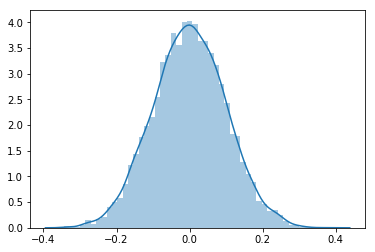

In [66]:
sns.distplot(rando)

## Question 2

## The sample size is only 130. This sample size is large enough for a z test. It is assumed that each observation in the data is independent.

## Question 3

 ## Is the true population mean really 98.6 degrees F?

## Boot Strap Hypothesis Testing

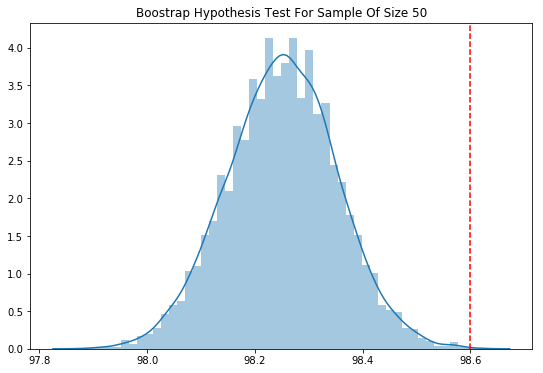

In [67]:
# bootstrap sample of 50

num_samples = 10000
sample_means_50 = np.empty(num_samples)
for idx in range(num_samples):
    bs_sample = np.random.choice(df.temperature,size = 50)
    sample_means_50[idx] = np.mean(bs_sample)
    

fig, ax = plt.subplots(figsize=(9, 6))
sns.distplot(sample_means_50)
plt.title('Boostrap Hypothesis Test For Sample Of Size 50')
plt.axvline(98.6, color='red', linestyle='--')

In [68]:
print('The mean of the sample means for samples of size 50:')
print('for ' + str(num_samples)+ ' samples')
print(np.mean(sample_means_50))

The mean of the sample means for samples of size 50:
for 10000 samples
98.2504554


In [69]:
# p value for boostrap replicates
# Compute and print the p-value: p
p = np.sum(sample_means_50 >= 98.6) / len(sample_means_50)
print('p-val =', p)

p-val = 0.0003


## The p value for obtaining 98.6 or greater from the bootstrap replicate distributions  is less than 0.01, which makes it very unlikely to obtain a value this extreme as shown in the above graph. Therefore, based on this p-value, the bootstrap test indicates that the true population mean body temperature data is NOT 98.6 and reject the null hypothesis.

## The z-test is more appropriate when the sample size is greater than 30. But, for comparison, I will also use the t-test.

## Use the One sample t-test. This is a two-sided test for the null hypothesis that the expected value (mean) of a  sample of independent observations a is equal to the given population mean, popmean.

In [70]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## Based on p-value of 2.41e-07 obtained from the one sample t-test, the sample mean is NOT equal to the predicted population mean of 98.6 degrees F.

## Z-test 

In [71]:
from statsmodels.stats import weightstats as stests
#ztest ,pval = stests.ztest(98.2, 98.6)
ztest ,pval = stests.ztest(df.temperature, x2=None, value= 98.6)
print('p value:')
print(float(pval))
print()
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p value:
4.9021570141012155e-08

Reject null hypothesis


## Based on the low p-value obtained from the one sample z-test, we reject the null hypothesis that the population body temperature the data came from is 98.6 degrees Fahrenheit.

## Interestingly, a recent published study regarding human body temperature reported that the average human body temperature of adults younger than 60 years old is ~ 36.69  degrees Celsius or 98.04 degrees Fahrenheit, which is lower than the mean temperature of 98.2 from the data or the 98.6 degrees reported by Carl Wunderlich.

## Question 4

## Sample of Size 10

## Small Sample t-test

In [72]:
# Create a sample of size 10 from body temperature data
random.seed(42)
sample_size10 = np.random.choice(df.temperature,size = 10, )
print(np.mean(sample_size10))

98.15


In [73]:
stats.ttest_1samp(sample_size10,98.6)

Ttest_1sampResult(statistic=-2.2738101868795511, pvalue=0.049056515042058241)

In [74]:
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(sample_size10, x2=None, value= 98.6)
print('p value:')
print(float(pval))
print()
if pval<0.01:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p value:
0.022977401503209066

Accept null hypothesis


## The t-test is more appropriate for small sample size, 10 in this case. For this particular sample of size 10, both the z-test & t-test had p values greater than 0.01, and thererfore the null hypothesis that the population body temperature mean is 98.6 degrees  is NOT rejected at the 5% significance level. However, in other random samples of size 10 the null hypothesis was rejected. Given the variability in results obtained, a small sample is probably not the best way to test a hypothesis.

## The t-test is best used for small samples, sample size,n, < 30. While the z-test is best used when dealing with large sample sizes, n > 30.

## Question 5

## Data beyond two standard deviations away from the mean is considered "unusual" or "abnormal" data.

In [75]:
one_std = np.std(df.temperature)
two_std = 2*one_std
temp_mean = np.mean(df.temperature)
print('Two Standard Deviations:')
print(two_std)
print()
print("The mean body temperature is:")
print(np.mean(df.temperature))
print()
print("Standard deviation of body temperature:")
print(np.std(df.temperature))
print()
print("Two Standard deviation above mean body temperature:")
print(two_std + temp_mean)
print()
print("Two Standard deviation below mean body temperature:")
print(temp_mean - two_std)
print()

Two Standard Deviations:
1.4607155578100754

The mean body temperature is:
98.24923076923078

Standard deviation of body temperature:
0.7303577789050377

Two Standard deviation above mean body temperature:
99.70994632704085

Two Standard deviation below mean body temperature:
96.7885152114207



## Based on mean and standard deviation of body temperature data, a body temperature above 99.7 or below 96.7 would be considered "abnormal".

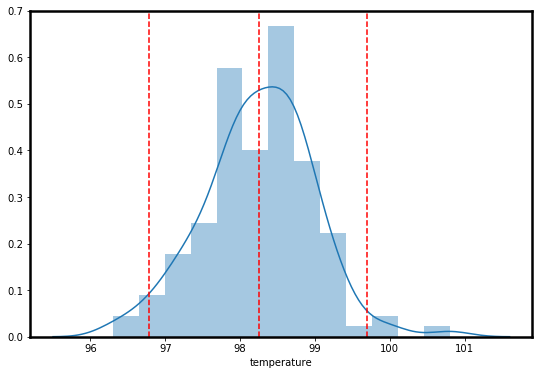

In [76]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.distplot(df.temperature)
plt.axvline(99.7, color='red', linestyle='--')
plt.axvline(temp_mean, color='red', linestyle='--')
plt.axvline(96.78, color='red', linestyle='--')

In [77]:
# bootstrap sample of 50
sample_means_50 = []
num_samples = 10000
for idx in range(num_samples):
    bs_sample = np.random.choice(df.temperature,size = 50)
    #bs_sample = np.random.choice(df.temperature,size = 20)
    sample_means_50.append(np.mean(bs_sample))
    
s_error = np.std(sample_means_50)
two_s_error = 2*s_error
sample_mean = np.mean(sample_means_50)
print(np.mean(sample_means_50))
print(sample_mean)
print()
print('The Standard Error is :')
print(s_error)
print()
print('Two SE below the sample mean:')
print(sample_mean - two_s_error)
print()
print('Two SE above the sample mean:')
print(sample_mean + two_s_error)
print()

98.2490786
98.2490786

The Standard Error is :
0.102310465848

Two SE below the sample mean:
98.0444576683

Two SE above the sample mean:
98.4536995317



## Note bootstrap standard error is considerably less than the standard deviation calculated above,  approximately 7X smaller.

## Based on Bootstrap sample of body temperature mean and bootstrap standard error with sample size of 50, a body temperature below 98.04 or above 98.4 degrees Farenheit would be considered "abnormal".

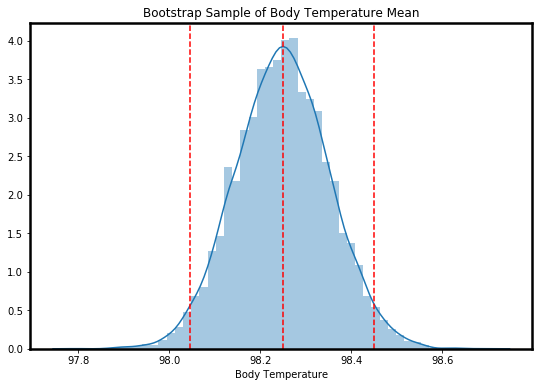

In [78]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.distplot(sample_means_50)
plt.xlabel('Body Temperature')
plt.axvline(98.045, color='red', linestyle='--')
plt.axvline(sample_mean, color='red', linestyle='--')
plt.axvline(98.45, color='red', linestyle='--')
plt.title('Bootstrap Sample of Body Temperature Mean')

## Question 6

In [79]:
print(np.mean(df[df.gender == 'F'].temperature))
print()
print(np.mean(df[df.gender == 'M'].temperature))

98.39384615384613

98.1046153846154


In [80]:
female = df[df.gender == 'F'].temperature
male = df[df.gender == 'M'].temperature
print(np.mean(male))
print()
print(np.mean(female))

98.1046153846154

98.39384615384613


In [81]:
print(len(female))
print()
print(len(male))

65

65


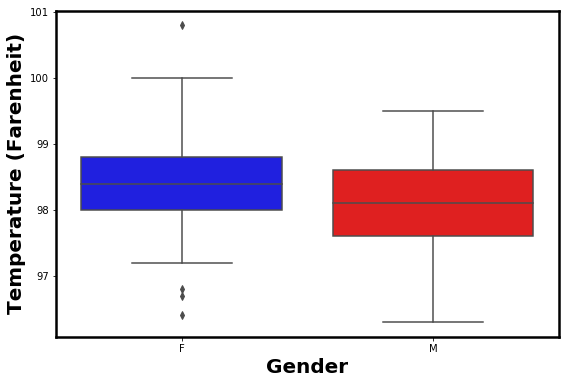

In [82]:
# visual ANOVA using boxplot
my_pal = {"M": "r", "F": "b"}
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="gender", y="temperature", data=df, palette=my_pal)
plt.xlabel('Gender',weight = 'bold',size =20)
plt.ylabel('Temperature (Farenheit)',weight = 'bold',size =20)

In [83]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

## t test: This is a two-sided test for the null hypothesis that the 2 groups,male and female,  have identical average (expected) values. Based on the obtained p-value of 0.024, the difference in mean body temperatures between men and women is significant. Therefore, we reject the null hypothesis that there is no difference in body temperature between men & women assuming we use a signifcance level of 5%. 

## Permutation sample to test for difference in body temperature between the sexes.
## Combine data for both women & men, permute the data , then take samples of appropriate size.

In [84]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[0:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [85]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
       # Generate permutation sample
       perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

       # Compute the test statistic
       perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [86]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [87]:
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(female,male,
                                diff_of_means , size=10000)

In [88]:
empirical_mean_diff = np.mean(female) - np.mean(male)
print("The observed difference in mean body temperature between women and men:")
print(empirical_mean_diff)

The observed difference in mean body temperature between women and men:
0.289230769230727


In [89]:
# Calculate p value of permutation replicate mean differences
p_val = float(np.sum(perm_replicates >= empirical_mean_diff) / len(perm_replicates))

# Print the result
print('For permutation sample replicates:')
print('p-value =', p_val)

For permutation sample replicates:
p-value = 0.0146


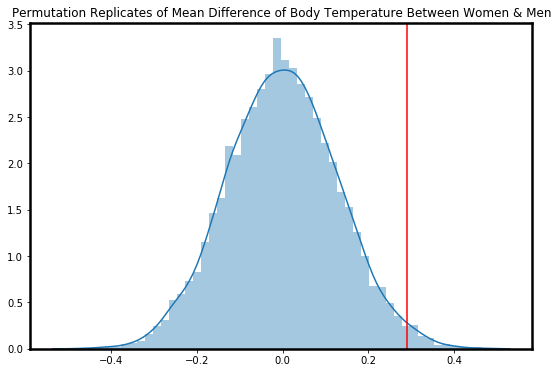

In [90]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.distplot(perm_replicates)
plt.axvline(x=empirical_mean_diff,color ='red')
plt.title('Permutation Replicates of Mean Difference of Body Temperature Between Women & Men')

## Based on the p-value for permutation replicates of ~ 0.015, the observed difference in body temperature means between women and men IS statistically significant. As shown in the above graph, it is unlikely to obtain the empirical difference in body temperature from a permutation replicate sample. Therefore, we reject the null hypothesis that there is no difference in body temperature between men & women assuming we use a signifcance level of 5%. 